In [98]:
# write an SGD optimization loop to find the parameters W of the multiclass logistic regression for
# the Iris data set. Can you give an interpretation for the 3 rows of W ?

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [100]:

# read the iris data
df = pd.read_csv('/home/kuangh/Desktop/Code/Math Foundation of ML/data/iris.csv')
feature_names = df.keys()
X = df.iloc[:, 0:4].to_numpy()



In [101]:
# add a '1' feature to every data sample to obtain 5 features
# X is a matrix of shape (150,5)
# 150 data samples, each has 5 features (4 original features + 1 bias feature)
X = np.hstack((X, np.ones((X.shape[0], 1))))
x_tensor = torch.tensor(X, dtype=torch.float32)

# convert the string labels to integers 0,1,2
# Iris-setosa -> 0
# Iris-versicolor -> 1
# Iris-virginica -> 2
# y is a vector of shape (150,)
y = df.iloc[:, 4].to_numpy()
y[y == 'Iris-setosa'] = 0
y[y == 'Iris-versicolor'] = 1
y[y == 'Iris-virginica'] = 2
y = y.astype(int)
y_tensor = torch.tensor(y, dtype=torch.long)

In [102]:
# devide the data into training and test sets randomly
# 120 training samples, 30 test samples
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)

# another way to devide the data into training and test sets randomly
# random_indices = np.random.permutation(x_tensor.shape[0])
# x_tensor = x_tensor[random_indices, :]
# y_tensor = y_tensor[random_indices]
# X_train = x_tensor[0:120, :]
# y_train = y_tensor[0:120]
# X_test = x_tensor[120:150, :]
# y_test = y_tensor[120:150]

In [103]:
# initiate the parameters W of the multiclass logistic regression
# W is a matrix of shape (3,5)
# 3 rows, each row corresponds to one class
# 5 columns, each column corresponds to one feature

W = torch.randn(3, 5, requires_grad=True)
B = 30 #batch size

# set the learning rate and the number of epochs
learning_rate = 0.01
num_epochs = 1000

for epoch in range(num_epochs):
    # compute the scores for each class
    # scores is a matrix of shape (120,3)
    # 120 training samples, each sample has 3 scores (one for each class)
    
    # shuffle training data
    perm = torch.randperm(x_train.shape[0])
    x_train = x_train[perm]
    y_train = y_train[perm]
    for i in range(0, x_train.shape[0], B):
        x_batch = x_train[i:i+B, :]
        y_batch = y_train[i:i+B]

        scores = x_batch @ W.T

        # compute the probabilities for each class using softmax
        # probs is a matrix of shape (120,3)
        # 120 training samples, each sample has 3 probabilities (one for each class)
        probs = torch.softmax(scores, dim=1)

        # compute the negative log likelihood loss
        # loss is a scalar
        loss = torch.nn.functional.nll_loss(torch.log(probs), y_batch)

        # compute the gradients of the loss with respect to W
        loss.backward()

        # update the parameters W using SGD
        with torch.no_grad():
            W -= learning_rate * W.grad

        # zero the gradients after updating
        W.grad.zero_()

    # print the loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 9.067761421203613
Epoch 100, Loss: 0.565281331539154
Epoch 200, Loss: 0.37719395756721497
Epoch 300, Loss: 0.35717254877090454
Epoch 400, Loss: 0.27529972791671753
Epoch 500, Loss: 0.3533789813518524
Epoch 600, Loss: 0.22658640146255493
Epoch 700, Loss: 0.1831960827112198
Epoch 800, Loss: 0.25886887311935425
Epoch 900, Loss: 0.20511609315872192


In [104]:
print(W)

tensor([[ 1.0979,  2.3755, -2.7259,  0.9769,  0.8106],
        [ 0.5272,  1.3630,  0.8263, -1.5798, -0.8481],
        [-0.6825, -0.2220,  2.6115,  0.9613, -1.6703]], requires_grad=True)


Test Accuracy: 0.9666666388511658
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


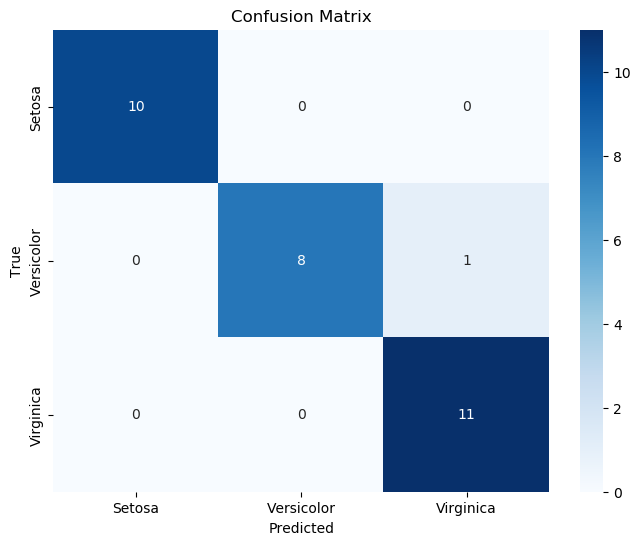

In [105]:

# evaluate the model on the test set
with torch.no_grad():
    scores_test = x_test @ W.T
    probs_test = torch.softmax(scores_test, dim=1)
    predicted_classes = torch.argmax(probs_test, dim=1)
    accuracy = (predicted_classes == y_test).float().mean()
    print(f'Test Accuracy: {accuracy.item()}')

# generate a confusion matrix
cm = confusion_matrix(y_test.numpy(), predicted_classes.numpy())
print('Confusion Matrix:')
print(cm)

# visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [106]:
# can you give an interpretation for each row of W
print(W)

tensor([[ 1.0979,  2.3755, -2.7259,  0.9769,  0.8106],
        [ 0.5272,  1.3630,  0.8263, -1.5798, -0.8481],
        [-0.6825, -0.2220,  2.6115,  0.9613, -1.6703]], requires_grad=True)
